In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
import pprint
import json
import pickle


# INPUT SECTION - Edit this section for different task inputs
tasks_data = {
    'Task1': {
        'Versions': [
            {'CL': {'Mi': 4, 'Oi': 2, 'Pow_i': 10, 'Yi,L': 0.5}, 'CH': {'Mi': 4, 'Oi': 2, 'Pow_i': 13, 'Yi,H': 0.7}},
        ]
    },
    'Task2': {
        'Versions': [
            {'CL': {'Mi': 10, 'Oi': 5, 'Pow_i': 20, 'Yi,L': 0.4}, 'CH': {'Mi': 10, 'Oi': 5, 'Pow_i': 26, 'Yi,H': 0.6}},
            {'CL': {'Mi': 10, 'Oi': 8, 'Pow_i': 22, 'Yi,L': 0.4}, 'CH': {'Mi': 10, 'Oi': 8, 'Pow_i': 29, 'Yi,H': 0.6}},
            {'CL': {'Mi': 10, 'Oi': 10, 'Pow_i': 24, 'Yi,L': 0.4}, 'CH': {'Mi': 10, 'Oi': 10, 'Pow_i': 30, 'Yi,H': 0.6}},
        ]
    },
    'Task3': {
        'Versions': [
            {'CL': {'Mi': 10, 'Oi': 2, 'Pow_i': 10, 'Yi,L': 0.5}, 'CH': {'Mi': 10, 'Oi': 2, 'Pow_i': 12, 'Yi,H': 0.6}},
            {'CL': {'Mi': 10, 'Oi': 4, 'Pow_i': 12, 'Yi,L': 0.5}, 'CH': {'Mi': 10, 'Oi': 4, 'Pow_i': 14, 'Yi,H': 0.6}},
            {'CL': {'Mi': 10, 'Oi': 6, 'Pow_i': 15, 'Yi,L': 0.5}, 'CH': {'Mi': 10, 'Oi': 6, 'Pow_i': 17, 'Yi,H': 0.6}},
        ]
    },
    'Task4': {
        'Versions': [
            {'CL': {'Mi': 28, 'Oi': 16, 'Pow_i': 15, 'Yi,L': 0.4}, 'CH': {'Mi': 28, 'Oi': 16, 'Pow_i': 18, 'Yi,H': 0.8}},
            {'CL': {'Mi': 28, 'Oi': 20, 'Pow_i': 18, 'Yi,L': 0.4}, 'CH': {'Mi': 28, 'Oi': 20, 'Pow_i': 21, 'Yi,H': 0.8}},
        ]
    },
    'Task5': {
        'Versions': [
            {'CL': {'Mi': 8, 'Oi': 2, 'Pow_i': 20, 'Yi,L': 0.5}, 'CH': {'Mi': 8, 'Oi': 2, 'Pow_i': 25, 'Yi,H': 0.7}},
            {'CL': {'Mi': 8, 'Oi': 4, 'Pow_i': 24, 'Yi,L': 0.5}, 'CH': {'Mi': 8, 'Oi': 4, 'Pow_i': 28, 'Yi,H': 0.7}},
            {'CL': {'Mi': 8, 'Oi': 5, 'Pow_i': 27, 'Yi,L': 0.5}, 'CH': {'Mi': 8, 'Oi': 5, 'Pow_i': 31, 'Yi,H': 0.7}},
        ]
    },
    'Task6': {
        'Versions': [
            {'CL': {'Mi': 10, 'Oi': 3, 'Pow_i': 10, 'Yi,L': 0.5}, 'CH': {'Mi': 10, 'Oi': 3, 'Pow_i': 12, 'Yi,H': 0.7}},
            {'CL': {'Mi': 10, 'Oi': 6, 'Pow_i': 12, 'Yi,L': 0.5}, 'CH': {'Mi': 10, 'Oi': 6, 'Pow_i': 14, 'Yi,H': 0.7}},
            {'CL': {'Mi': 10, 'Oi': 9, 'Pow_i': 14, 'Yi,L': 0.5}, 'CH': {'Mi': 10, 'Oi': 9, 'Pow_i': 16, 'Yi,H': 0.7}},
        ]
    }
}

# Constants
Deadline = 142
Number_of_types = 2
types = ['CL', 'CH']
MAX_POWER_FACTOR = 50  # Maximum allowed power factor sum

# GRAPH AND TOPOLOGICAL SORT
class Graph:
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def neighbor_gen(self, v):
        for k in self.graph[v]:
            yield k

    def nonRecursiveTopologicalSortUtil(self, v, visited, stack):
        working_stack = [(v, self.neighbor_gen(v))]

        while working_stack:
            v, gen = working_stack.pop()
            visited[v] = True

            for next_neighbor in gen:
                if not visited[next_neighbor]:
                    working_stack.append((v, gen))
                    working_stack.append((next_neighbor, self.neighbor_gen(next_neighbor)))
                    break
            else:
                stack.append(v)

    def nonRecursiveTopologicalSort(self):
        visited = [False] * self.V
        stack = []

        for i in range(1, self.V):
            if not visited[i]:
                self.nonRecursiveTopologicalSortUtil(i, visited, stack)

        stack.reverse()
        return stack

    def find_successors(self, start_task):
        visited = set()
        successors = []

        def dfs(v):
            if v in visited:
                return
            visited.add(v)
            for neighbor in self.graph[v]:
                if neighbor not in visited:
                    successors.append(neighbor)
                    dfs(neighbor)
        
        dfs(start_task)
        return successors

# Create and populate the graph
g = Graph(7)
g.addEdge(1, 2)
g.addEdge(1, 3)
g.addEdge(1, 5)
g.addEdge(2, 4)
g.addEdge(3, 6)
g.addEdge(4, 6)
g.addEdge(5, 6)

# Get the topological sort
topological_sort = g.nonRecursiveTopologicalSort()
task_list = [f'Task{num}' for num in topological_sort]  # Convert to task format

# Print the topological sort
print("\nTopological Sort of Tasks:")
print(topological_sort)

# SCHEDULING PARALLEL TASKS
parallel_tasks = [
    [2, 3, 5]  # Example parallel tasks
]

Sorted_results = {"Parallel Tasks Successors": {}}

# Loop through parallel tasks and find successors
for index, task_set in enumerate(parallel_tasks, start=1):
    Sorted_results["Parallel Tasks Successors"][f"Parallel Task Set {index}"] = {}
    for task in task_set:
        successors = g.find_successors(task)
        Sorted_results["Parallel Tasks Successors"][f"Parallel Task Set {index}"][task] = {
            "Number of Successors": len(successors),
            "Successor Tasks": successors
        }

# Print the successors for each parallel task set
print("\nSuccessors of Parallel Tasks:")
pprint.pprint(Sorted_results)

# EXECUTION TIME CALCULATIONS
def calculate_execution_time(data):
    for task, task_data in data.items():
        for version in task_data['Versions']:
            cl = version['CL']
            cl_execution_time = round((cl['Mi'] + cl['Oi']) / (0.5 * cl['Yi,L']))
            cl['Execution_Time'] = cl_execution_time

            ch = version.get('CH', {})
            if ch:
                ch_execution_time = round((ch['Mi'] + ch['Oi']) / ch['Yi,H'])
                ch['Execution_Time'] = ch_execution_time

calculate_execution_time(tasks_data)

# Print tasks with calculated execution times
print("\nTasks with Calculated Execution Times:")
pprint.pprint(tasks_data)

# CLASSIFICATION BASED ON SUCCESSORS (CH/CL)
task_classification = {'CH': [], 'CL': []}

for task_set, tasks in Sorted_results['Parallel Tasks Successors'].items():
    for task, details in tasks.items():
        num_successors = details['Number of Successors']
        task_name = f"Task{task}"
        if num_successors > 1:
            task_classification['CH'].append(task_name)
        else:
            task_classification['CL'].append(task_name)

# Print task classification into CH and CL
print("\nTask Classification (CH/CL):")
pprint.pprint(task_classification)

# POWER FACTOR AND VERSION SELECTION
result = {}

for ch_task in task_classification['CH']:
    if ch_task in tasks_data:
        ch_versions = tasks_data[ch_task]['Versions']
        highest_ch_version = len(ch_versions) - 1
        ch_data = ch_versions[highest_ch_version]['CH']
        ch_power_factor = ch_data['Pow_i']
        ch_execution_time = ch_data.get('Execution_Time', None)
        
        result[ch_task] = {
            'CH': {
                'Version': f'Version {highest_ch_version + 1}',
                'Power_Factor': ch_power_factor,
                'Execution_Time': ch_execution_time
            }
        }

        for cl_task in task_classification['CL']:
            if cl_task in tasks_data:
                cl_versions = tasks_data[cl_task]['Versions']
                chosen_version_index = len(cl_versions) - 1
                cl_data = cl_versions[chosen_version_index]['CL']
                cl_power_factor = cl_data['Pow_i']
                cl_execution_time = cl_data.get('Execution_Time', None)

                while (ch_power_factor + cl_power_factor) > MAX_POWER_FACTOR and chosen_version_index > 0:
                    chosen_version_index -= 1
                    cl_data = cl_versions[chosen_version_index]['CL']
                    cl_power_factor = cl_data['Pow_i']
                    cl_execution_time = cl_data.get('Execution_Time', None)

                result[cl_task] = {
                    'CL': {
                        'Version': f'Version {chosen_version_index + 1}',
                        'Power_Factor': cl_power_factor,
                        'Execution_Time': cl_execution_time
                    }
                }

# Print the selected versions with power factor considerations
print("\nSelected Versions with Power Factor Considerations:")
pprint.pprint(result)

# UPDATED TASKS
final_result = {}
for task, details in result.items():
    task_type, task_data = list(details.items())[0]
    version_number = int(task_data['Version'].split(' ')[1]) - 1
    updated_task_data = tasks_data[task]['Versions'][version_number][task_type]
    final_result[task] = {task_type: updated_task_data}

# Print the final updated tasks with selected versions
print("\nFinal Updated Tasks with Selected Versions:")
pprint.pprint(final_result)

# NUMBER OF LEVELS & TASKS AT EACH LEVEL
def calculate_levels(graph):
    topo_sort = list(nx.topological_sort(graph))
    levels = {node: 0 for node in graph.nodes}
    tasks_by_level = {}
    
    for node in topo_sort:
        current_level = levels[node]
        for successor in graph.successors(node):
            levels[successor] = max(levels[successor], current_level + 1)
    
    for node, level in levels.items():
        if level not in tasks_by_level:
            tasks_by_level[level] = []
        tasks_by_level[level].append(node)
    
    max_level = max(levels.values())
    total_levels = max_level + 1
    
    return total_levels, tasks_by_level

# Initialize graph and calculate levels
task_graph = nx.DiGraph()
nodes = range(1, 7)
task_graph.add_nodes_from(nodes)
edges = [
    (1, 2),
    (1, 3),
    (1, 5),
    (2, 4),
    (3, 6),
    (4, 6),
    (5, 6)
]
task_graph.add_edges_from(edges)

total_levels, tasks_by_level = calculate_levels(task_graph)

# Print the number of levels and tasks at each level
print("\nTotal Number of Levels:", total_levels)
print("Tasks at Each Level:")
pprint.pprint(tasks_by_level)

# ASSIGNING TASKS INTO MATRICES
execution_time_matrix = np.zeros((2, total_levels), dtype=object)
task_name_matrix = np.full((2, total_levels), None, dtype=object)

count_cl = 0
count_ch = 0

for task in task_list:
    if task in final_result:
        task_type = list(final_result[task].keys())[0]
        execution_time = final_result[task][task_type]['Execution_Time']

        if task_type == 'CL':
            count_cl += 1
            if count_cl < total_levels:
                execution_time_matrix[0][count_cl] = execution_time
                task_name_matrix[0][count_cl] = task
        elif task_type == 'CH':
            count_ch += 1
            if count_ch < total_levels:
                execution_time_matrix[1][count_ch] = execution_time
                task_name_matrix[1][count_ch] = task

execution_time_matrix[0][0] = 0
execution_time_matrix[1][0] = 0
task_name_matrix[0][0] = None
task_name_matrix[1][0] = None

# Print the initial matrices
print("\nInitial Execution Time Matrix:")
print(execution_time_matrix)
print("\nInitial Task Name Matrix:")
print(task_name_matrix)

# Determine which columns are empty
zero_columns = []
for col in range(total_levels):
    if execution_time_matrix[0][col] == 0 and execution_time_matrix[1][col] == 0:
        zero_columns.append(col + 1)

# HANDLE MISSING TASKS
zero_levels = [col - 1 for col in zero_columns]
tasks_at_zero_levels = []

for level in zero_levels:
    if level in tasks_by_level:
        tasks_at_zero_levels.extend(tasks_by_level[level])

for task in tasks_at_zero_levels:
    task_key = f"Task{task}"
    if task_key in tasks_data:
        versions = tasks_data[task_key]['Versions']
        max_oi = -1
        max_version = None
        for version in versions:
            for type_key, data in version.items():
                if data['Oi'] > max_oi:
                    max_oi = data['Oi']
                    max_version = data

        least_execution_time = float('inf')
        best_type = None
        
        for version in versions:
            for type_key, data in version.items():
                if data['Execution_Time'] < least_execution_time:
                    least_execution_time = data['Execution_Time']
                    best_type = type_key
        
        index = zero_levels[tasks_at_zero_levels.index(task)]
        if best_type == 'CL':
            execution_time_matrix[0][index] = least_execution_time
            task_name_matrix[0][index] = task_key
        elif best_type == 'CH':
            execution_time_matrix[1][index] = least_execution_time
            task_name_matrix[1][index] = task_key

# Print matrices after handling missing tasks
print("\nExecution Time Matrix After Handling Missing Tasks:")
print(execution_time_matrix)
print("\nTask Name Matrix After Handling Missing Tasks:")
print(task_name_matrix)

# FIND AND HANDLE MISSING TASKS IN MATRICES
tasks_in_matrix = set(task_name for row in task_name_matrix for task_name in row if task_name is not None)
task_list_set = set(task_list)
missing_tasks = task_list_set - tasks_in_matrix

for missing_task in missing_tasks:
    task_number = int(missing_task.replace('Task', ''))

    task_level = None
    for level, tasks in tasks_by_level.items():
        if task_number in tasks:
            task_level = level
            break

    if task_level is not None:
        respective_column = task_level
        if execution_time_matrix[0][respective_column] == 0:
            available_row = 0
            row_type = 'CL'
        elif execution_time_matrix[1][respective_column] == 0:
            available_row = 1
            row_type = 'CH'
        else:
            available_row = None

        if available_row is not None:
            max_oi = -1
            selected_version = None
            for version in tasks_data[missing_task]['Versions']:
                if version[row_type]['Oi'] > max_oi:
                    max_oi = version[row_type]['Oi']
                    selected_version = version[row_type]

            if selected_version:
                execution_time_matrix[available_row][respective_column] = selected_version['Execution_Time']
                task_name_matrix[available_row][respective_column] = missing_task

# Print final matrices
print("\nFinal Execution Time Matrix:")
print(execution_time_matrix)
print("\nFinal Task Name Matrix:")
print(task_name_matrix)

# Initialize the result dictionary
result = {}

# Iterate through the task_name_matrix and execution_time_matrix
rows, cols = task_name_matrix.shape
for row in range(rows):
    for col in range(cols):
        task_name = task_name_matrix[row, col]
        if task_name:
            execution_time = execution_time_matrix[row, col]
            versions = tasks_data[task_name]['Versions']

            # Determine whether the task is CL or CH based on the execution time
            selected_version = None
            for version in versions:
                cl_data = version.get('CL', {})
                ch_data = version.get('CH', {})
                
                if cl_data.get('Execution_Time') == execution_time:
                    selected_version = cl_data
                    result[task_name] = {'CL': selected_version}
                elif ch_data.get('Execution_Time') == execution_time:
                    selected_version = ch_data
                    result[task_name] = {'CH': selected_version}

# Print the final result dictionary
print("\nFinal Task Version Selections:")
pprint.pprint(result)
print()

# PROCESSING TASK EXECUTION SEQUENCE
start_finish_times = {}

# Process each column in the matrices to understand task flow
for col in range(task_name_matrix.shape[1]):
    for row in range(task_name_matrix.shape[0]):
        task_name = task_name_matrix[row, col]
        execution_time = execution_time_matrix[row, col]
        
        if task_name is not None:
            task_type = 'CH' if row == 1 else 'CL'
            
            if row == 1 and col == 0:  # Task1 is executed first
                start_time = 0
            else:  # Other tasks
                if task_name == 'Task6':
                    # Task6 starts after Task3, Task5, and Task4 are completed
                    predecessor_tasks = ['Task3', 'Task5', 'Task4']
                elif task_name == 'Task5':
                    # Task5 starts after Task1 is completed
                    predecessor_tasks = ['Task1']
                elif task_name == 'Task3':
                    # Task3 starts after Task5 is completed
                    predecessor_tasks = ['Task5']
                elif task_name == 'Task2':
                    # Task2 starts after Task1 is completed
                    predecessor_tasks = ['Task1']
                elif task_name == 'Task4':
                    # Task4 starts after Task2 is completed
                    predecessor_tasks = ['Task2']

                # Find the maximum finish time among the predecessor tasks
                start_time = max(
                    start_finish_times[predecessor][2]
                    for predecessor in predecessor_tasks
                    if predecessor in start_finish_times
                )

            finish_time = start_time + execution_time
            start_finish_times[task_name] = (task_type, start_time, finish_time)

# Store task execution sequence in a dictionary with the requested format
task_execution_sequence = {}

for task, (task_type, start, finish) in start_finish_times.items():
    task_execution_sequence[task] = {
        'type': task_type,
        'Start_Time': start,
        'Finish_Time': finish
    }

# Print the dictionary to see the output
print("Task Execution Sequence Dictionary:")
print(task_execution_sequence)
print()


# Identify columns with no zeros
valid_columns = np.all(execution_time_matrix != 0, axis=0)
columns_with_zeros = ~valid_columns

# Filter the matrices to get only the valid columns
filtered_execution_time_matrix = execution_time_matrix[:, valid_columns]
filtered_task_name_matrix = task_name_matrix[:, valid_columns]

# Initialize a list to store the unique task combinations and their corresponding power factors
parallel_task_power_factors = []

# Use a set to keep track of seen combinations (unordered pairs)
seen_combinations = set()

# Function to get the power factor from the result dictionary
def get_power_factor(task, execution_time):
    task_data = result.get(task)
    if task_data:
        for task_type, details in task_data.items():
            if details['Execution_Time'] == execution_time:
                return details['Pow_i']
    return None

# Generate all combinations of row1 + row2 across valid columns using power factors
for i in range(filtered_execution_time_matrix.shape[1]):
    for j in range(i, filtered_execution_time_matrix.shape[1]):
        task1_row1 = filtered_task_name_matrix[0, i]
        task2_row2 = filtered_task_name_matrix[1, j]
        
        if task1_row1 and task2_row2:
            pow_i1 = get_power_factor(task1_row1, filtered_execution_time_matrix[0, i])
            pow_i2 = get_power_factor(task2_row2, filtered_execution_time_matrix[1, j])
            if pow_i1 is not None and pow_i2 is not None:
                tasks = tuple(sorted([task1_row1, task2_row2]))
                if tasks not in seen_combinations:
                    combined_power = pow_i1 + pow_i2
                    parallel_task_power_factors.append((f'{tasks[0]} + {tasks[1]}', combined_power))
                    seen_combinations.add(tasks)

        # Also add the reverse combination (row2 + row1)
        task1_row2 = filtered_task_name_matrix[1, i]
        task2_row1 = filtered_task_name_matrix[0, j]
        
        if task1_row2 and task2_row1:
            pow_i1 = get_power_factor(task1_row2, filtered_execution_time_matrix[1, i])
            pow_i2 = get_power_factor(task2_row1, filtered_execution_time_matrix[0, j])
            if pow_i1 is not None and pow_i2 is not None:
                tasks = tuple(sorted([task1_row2, task2_row1]))
                if tasks not in seen_combinations:
                    combined_power = pow_i1 + pow_i2
                    parallel_task_power_factors.append((f'{tasks[0]} + {tasks[1]}', combined_power))
                    seen_combinations.add(tasks)

# Handle columns with zeros separately
for col in range(execution_time_matrix.shape[1]):
    if columns_with_zeros[col]:
        task = task_name_matrix[1, col]  # Take the task from row 2, as row 1 has zero
        if task:
            sum_value = get_power_factor(task, execution_time_matrix[1, col])
            if sum_value is not None:
                parallel_task_power_factors.append((task, sum_value))

# Sort the combined list of tasks and power factors by task name
parallel_task_power_factors.sort()

# Print the sorted list of parallel tasks and their corresponding power factors
print("Parallel tasks and their corresponding power factors (sorted):")
for task in parallel_task_power_factors:
    print(task)


Topological Sort of Tasks:
[1, 5, 3, 2, 4, 6]

Successors of Parallel Tasks:
{'Parallel Tasks Successors': {'Parallel Task Set 1': {2: {'Number of Successors': 2,
                                                           'Successor Tasks': [4,
                                                                               6]},
                                                       3: {'Number of Successors': 1,
                                                           'Successor Tasks': [6]},
                                                       5: {'Number of Successors': 1,
                                                           'Successor Tasks': [6]}}}}

Tasks with Calculated Execution Times:
{'Task1': {'Versions': [{'CH': {'Execution_Time': 9,
                                'Mi': 4,
                                'Oi': 2,
                                'Pow_i': 13,
                                'Yi,H': 0.7},
                         'CL': {'Execution_Time': 24,
        

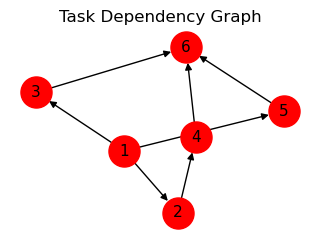

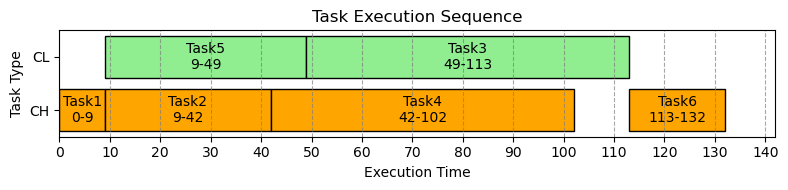

In [7]:
# Draw the graph
plt.figure(figsize=(3, 2))
pos = nx.spring_layout(task_graph)  # Position nodes using the spring layout
nx.draw(task_graph, pos, with_labels=True, node_color='red', node_size=500, 
        edge_color='black', font_size=11), #font_weight='bold')
#nx.draw_networkx_edge_labels(task_graph, pos, edge_labels={(u, v): f'{u}->{v}' for u, v in edges})
plt.title("Task Dependency Graph")
plt.show()

print()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 2))

# Define y-axis positions for CL and CH
y_positions = {'CH': 1, 'CL': 2}
colors = {'CH': 'orange', 'CL': 'lightgreen'}

# Plot each task as a rectangle
for task, details in task_execution_sequence.items():
    task_type = details['type']
    start_time = details['Start_Time']
    finish_time = details['Finish_Time']
    
    # Determine the y position based on the task type
    y_position = y_positions[task_type]
    
    # Calculate width of the box
    width = finish_time - start_time
    
    # Draw the rectangle with a height of 0.8 units
    rect = patches.Rectangle((start_time, y_position - 0.4), width, 0.8, edgecolor='black', facecolor=colors[task_type])
    ax.add_patch(rect)
    
    # Add task label and execution time inside the box
    ax.text(start_time + width / 2, y_position, f'{task}\n{start_time}-{finish_time}', ha='center', va='center', fontsize=10, color='black')

# Set y-axis limits and labels
ax.set_ylim(0.5, 2.5)  # y-axis to accommodate both CL and CH stacked
ax.set_yticks([1, 2])
ax.set_yticklabels(['CH', 'CL'])

# Set x-axis limits and labels
ax.set_xlim(0, Deadline)  # Set x-axis limit to the deadline
ax.set_xticks(range(0, Deadline + 1, 10))  # Mark every 5 units on the x-axis

# Add grid lines for better readability
ax.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.7)

# Add labels and title
ax.set_xlabel('Execution Time')
ax.set_ylabel('Task Type')
ax.set_title('Task Execution Sequence')

# Show the plot
plt.tight_layout()
plt.show()

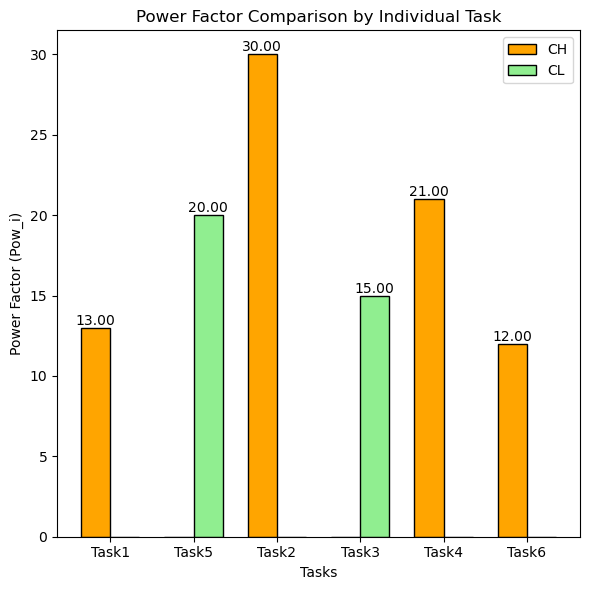

In [8]:
# Assuming tasks, ch_power_factors, and cl_power_factors are already defined as numpy arrays
tasks = []
ch_power_factors = []
cl_power_factors = []

for task, details in task_execution_sequence.items():
    task_type = details['type']
    start_time = details['Start_Time']
    finish_time = details['Finish_Time']
    
    selected_execution_time = finish_time - start_time
    
    # Find the matching version in tasks_data
    for version in tasks_data[task]['Versions']:
        if version[task_type]['Execution_Time'] == selected_execution_time:
            pow_i = version[task_type]['Pow_i']
            tasks.append(task)
            if task_type == 'CH':
                ch_power_factors.append(pow_i)
                cl_power_factors.append(0)  # For spacing
            elif task_type == 'CL':
                cl_power_factors.append(pow_i)
                ch_power_factors.append(0)  # For spacing
            break

# Convert lists to numpy arrays for easier manipulation
ch_power_factors = np.array(ch_power_factors)
cl_power_factors = np.array(cl_power_factors)

# Plotting the power factors
fig, ax = plt.subplots(figsize=(6, 6))

# Bar positions for CH and CL
bar_width = 0.35
index = np.arange(len(tasks))

# Plot CH and CL power factors
bars_ch = ax.bar(index, ch_power_factors, bar_width, label='CH', color='orange', edgecolor='black')
bars_cl = ax.bar(index + bar_width, cl_power_factors, bar_width, label='CL', color='lightgreen', edgecolor='black')

# Add labels, title, and custom x-axis labels
ax.set_xlabel('Tasks')
ax.set_ylabel('Power Factor (Pow_i)')
ax.set_title('Power Factor Comparison by Individual Task')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tasks)
ax.legend()

# Annotate bars with their respective values
for bar in bars_ch:
    yval = bar.get_height()
    if yval > 0:  # Only annotate non-zero bars
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars_cl:
    yval = bar.get_height()
    if yval > 0:  # Only annotate non-zero bars
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


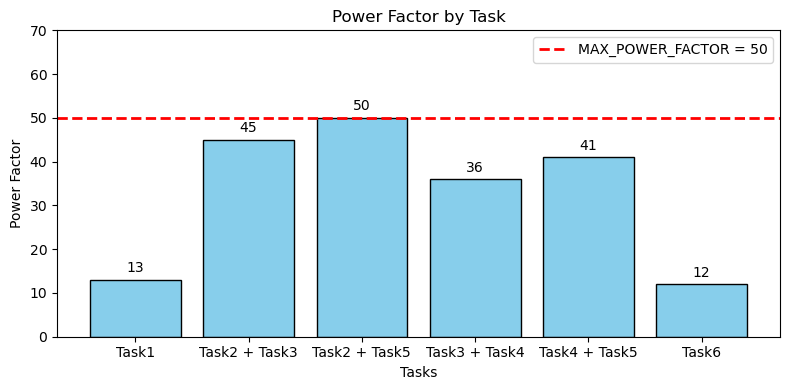

In [9]:
# Separate the tasks and power factors into two lists
tasks = [task for task, _ in parallel_task_power_factors]
power_factors = [power for _, power in parallel_task_power_factors]

# Create the bar chart
plt.figure(figsize=(8, 4))
plt.bar(tasks, power_factors, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Tasks')
plt.ylabel('Power Factor')
plt.title('Power Factor by Task')

# Set y-axis limit to 70
plt.ylim(0, 70)

# Draw a red line at MAX_POWER_FACTOR = 50
plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='MAX_POWER_FACTOR = 50')

# Annotate the bars with their power factor values
for i, value in enumerate(power_factors):
    plt.text(i, value + 1, f'{value}', ha='center', va='bottom')

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

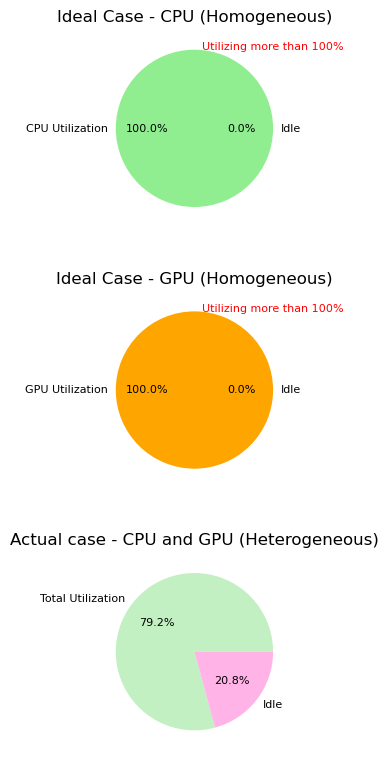

In [30]:
# Example calculated utilizations
cpu_utilization_ideal = 110  # Replace with your calculated value
gpu_utilization_ideal = 120  # Replace with your calculated value
gpu_utilization_actual = (sum(execution_time_matrix[1]) / Deadline) * 100
cpu_utilization_actual = (sum(execution_time_matrix[0]) / Deadline) * 100
total_utilization_actual = (gpu_utilization_actual + cpu_utilization_actual) / 2

# Normalize the utilizations to ensure they don't exceed 100%
cpu_utilization_ideal = min(cpu_utilization_ideal, 100)
gpu_utilization_ideal = min(gpu_utilization_ideal, 100)
total_utilization_actual = min(total_utilization_actual, 100)

# Plotting the pie charts in a vertical layout
fig, axs = plt.subplots(3, 1, figsize=(3, 8))

# Ideal Case 1 (CPU Utilization)
axs[0].pie([cpu_utilization_ideal, 100 - cpu_utilization_ideal], labels=['CPU Utilization', 'Idle'], autopct='%1.1f%%', colors=['#90EE90','#66b3ff'], textprops={'fontsize': 8}
)
axs[0].set_title('Ideal Case - CPU (Homogeneous)')
if cpu_utilization_ideal >= 100:
    axs[0].text(1, 1, 'Utilizing more than 100%', horizontalalignment='center', color='red', fontsize=8)

# Ideal Case 2 (GPU Utilization)
axs[1].pie([gpu_utilization_ideal, 100 - gpu_utilization_ideal], labels=['GPU Utilization', 'Idle'], autopct='%1.1f%%', colors=['#FFA500','#66b3ff'], textprops={'fontsize': 8}
)
axs[1].set_title('Ideal Case - GPU (Homogeneous)')
if gpu_utilization_ideal >= 100:
    axs[1].text(1, 1, 'Utilizing more than 100%', horizontalalignment='center', color='red', fontsize=8)

# Actual Case (Total Utilization of CPU + GPU)
axs[2].pie([total_utilization_actual, 100 - total_utilization_actual], labels=['Total Utilization', 'Idle'], autopct='%1.1f%%', colors=['#c2f0c2', '#ffb3e6'], textprops={'fontsize': 8})
axs[2].set_title('Actual case - CPU and GPU (Heterogeneous)')  # Empty title for the last pie chart
if total_utilization_actual >= 100:
    axs[2].text(1, 1, 'Utilizing more than 100%', horizontalalignment='center', color='red', fontsize=8)

plt.tight_layout()
plt.show()